# 데이터 마이닝 중간 과제

데이터 출처 : https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection/data

In [ ]:
# 데이터 분석에 필요한 패키지 import
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

In [ ]:
warnings.filterwarnings('ignore')

# 데이터 불러오기
data = pd.read_csv("C:/Users/daily/Downloads/bank_transactions_data_2.csv")

# 데이터 변수 정보 확인
print('----------- data info -----------')
print(data.info())
print('')

# CustomerAge 변수를 구간화
bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 100]
labels = ['Under 10', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s', 'Over 90']
data['AgeGroup'] = pd.cut(data['CustomerAge'], bins=bins, labels=labels, right=True)

# CustomerAge를 AgeGroup으로 대체
data.drop('CustomerAge', axis = 1, inplace= True)
data['AgeGroup'].astype('category')

# 기초 통계량 출력
print('----------- data describe -----------')
desc = data.describe()
print(desc)

----------- data info -----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int

# 수치형 변수 분석

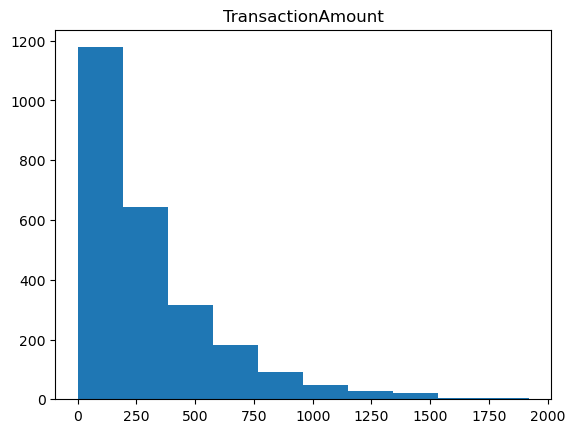

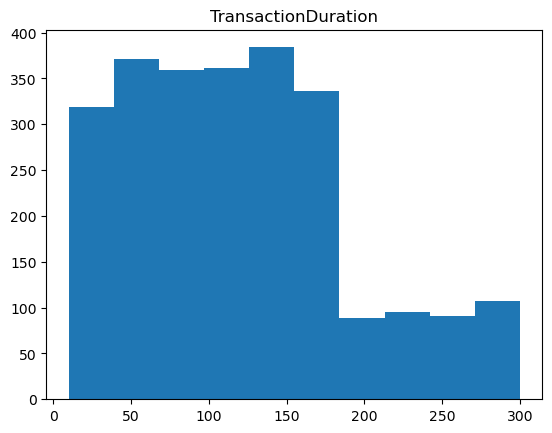

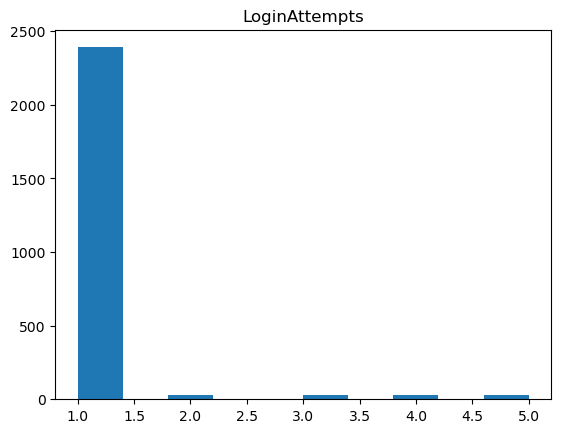

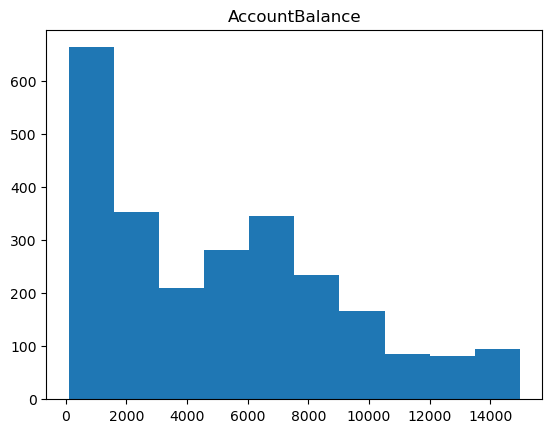

In [5]:
# 수치형 데이터의 분포를 히스토그램으로 확인

continual = ['TransactionAmount', 'TransactionDuration', 
             'LoginAttempts', 'AccountBalance']

for i in continual:
    plt.title(i)
    plt.hist(data[i])
    plt.show()

# 스케일링 전 공분산 확인

                     TransactionAmount  TransactionDuration  LoginAttempts  \
TransactionAmount             1.000000             0.004359      -0.008445   
TransactionDuration           0.004359             1.000000       0.032639   
LoginAttempts                -0.008445             0.032639       1.000000   
AccountBalance               -0.025165             0.005577       0.014999   

                     AccountBalance  
TransactionAmount         -0.025165  
TransactionDuration        0.005577  
LoginAttempts              0.014999  
AccountBalance             1.000000  
                     TransactionAmount  TransactionDuration  LoginAttempts  \
TransactionAmount         85232.609025            89.041404      -1.485935   
TransactionDuration          89.041404          4894.927283       1.376202   
LoginAttempts                -1.485935             1.376202       0.363202   
AccountBalance           -28659.468379          1522.225359      35.262585   

                     Account

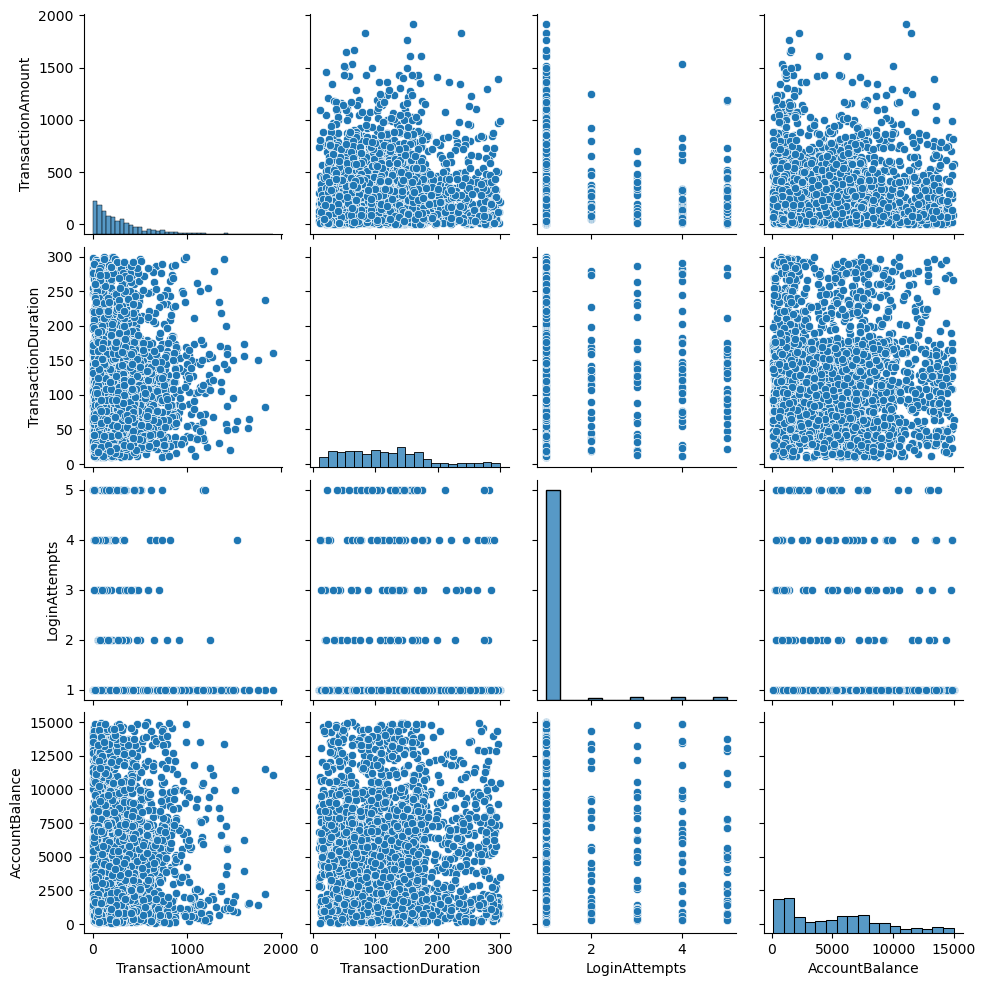

In [18]:
numeric_col = data[['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']]

# 공분산 행렬 계산
corr_matrix = numeric_col.corr()
cov_matrix = numeric_col.cov()

# 결과 출력
print(corr_matrix)
print(cov_matrix)

# 변수들의 산점도 확인
sns.pairplot(numeric_col)
plt.show()

# min-max 스케일링 후 공분산 확인

                     TransactionAmount  TransactionDuration  LoginAttempts  \
TransactionAmount             1.000000             0.004359      -0.008445   
TransactionDuration           0.004359             1.000000       0.032639   
LoginAttempts                -0.008445             0.032639       1.000000   
AccountBalance               -0.025165             0.005577       0.014999   

                     AccountBalance  
TransactionAmount         -0.025165  
TransactionDuration        0.005577  
LoginAttempts              0.014999  
AccountBalance             1.000000  
                     TransactionAmount  TransactionDuration  LoginAttempts  \
TransactionAmount             0.023149             0.000160      -0.000194   
TransactionDuration           0.000160             0.058204       0.001186   
LoginAttempts                -0.000194             0.001186       0.022700   
AccountBalance               -0.001004             0.000353       0.000593   

                     Account

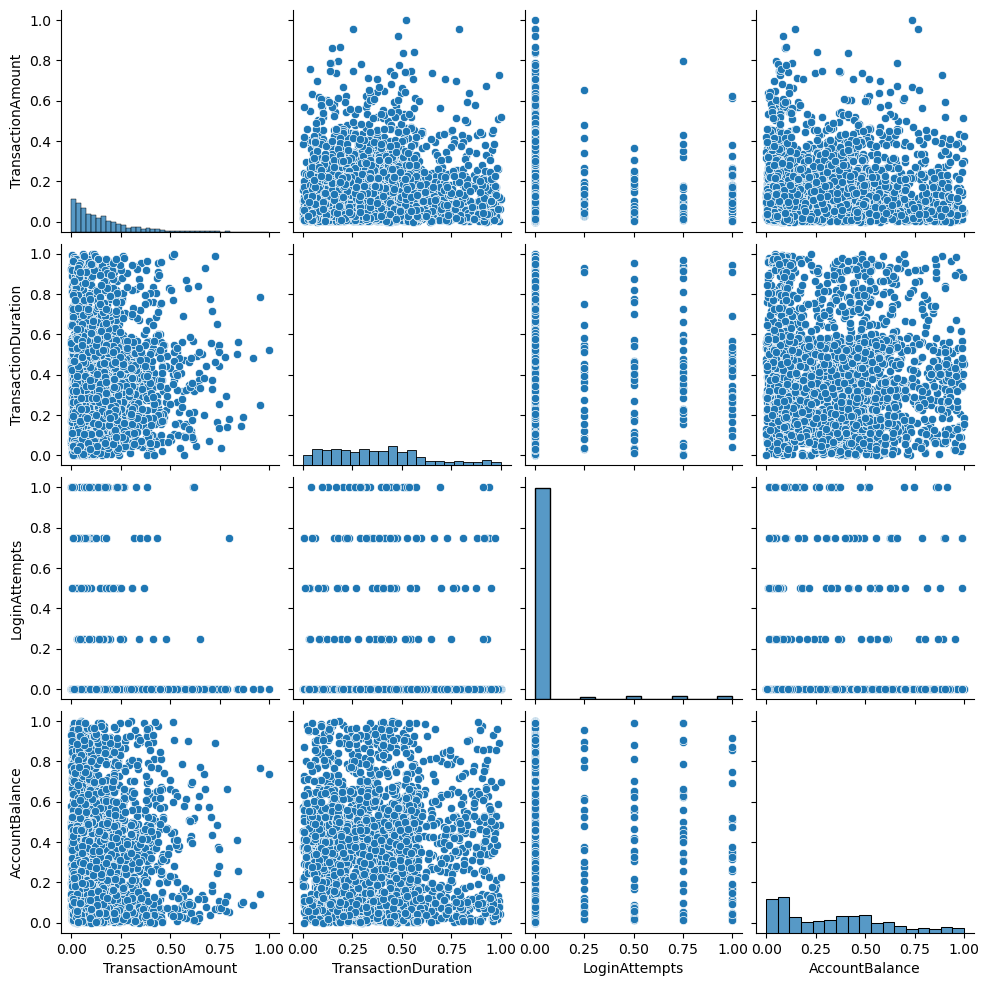

In [20]:
# min-max 스케일링 수행

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 수치형 데이터프레임
numeric_col = data[['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']]

# 표준화 수행
scaler = MinMaxScaler()
scaled_array = scaler.fit_transform(numeric_col)

# 결과를 데이터프레임으로 변환 (컬럼명 유지)
scaled_df = pd.DataFrame(scaled_array, columns=numeric_col.columns)

# 스케일링한 데이터로 교체
new_data = data.drop(columns = ['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance'])
scaled_data = pd.concat([new_data, scaled_df], axis = 1)

# 수치형 변수 선정
numeric_df = scaled_data[['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']]

# 공분산 행렬 계산
new_corr_matrix = numeric_df.corr()
new_cov_matrix = numeric_df.cov()

# 결과 출력
print(new_corr_matrix)
print(new_cov_matrix)

# 변수들의 산점도 확인
sns.pairplot(numeric_df)
plt.show()

# PCA 검정

Explained Variance Ratio: [0.26074641 0.254551   0.24345147 0.24125112]
Cumulative Variance: [0.26074641 0.51529741 0.75874888 1.        ]


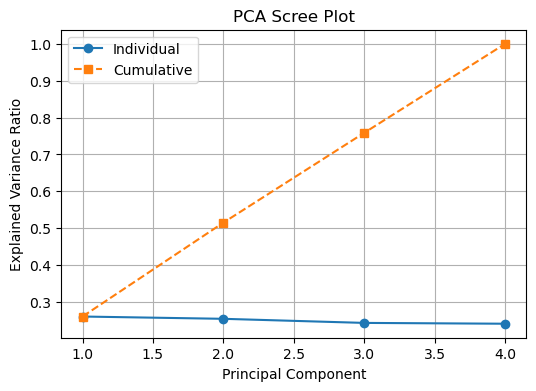

In [9]:
from sklearn.decomposition import PCA

# 1. 수치형 데이터 준비
numeric_df = data[['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']]

# 2. 표준화
scaler = StandardScaler()
scaled = scaler.fit_transform(numeric_df)

# 3. PCA 적용
pca = PCA()
pca.fit(scaled)

# 4. 설명된 분산 비율 출력
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)
print("Cumulative Variance:", explained_variance.cumsum())

# Scree plot (주성분별 설명력)
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', label='Individual')
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='s', linestyle='--', label='Cumulative')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Scree Plot')
plt.legend()
plt.grid(True)
plt.show()

# 범주형 변수 분석

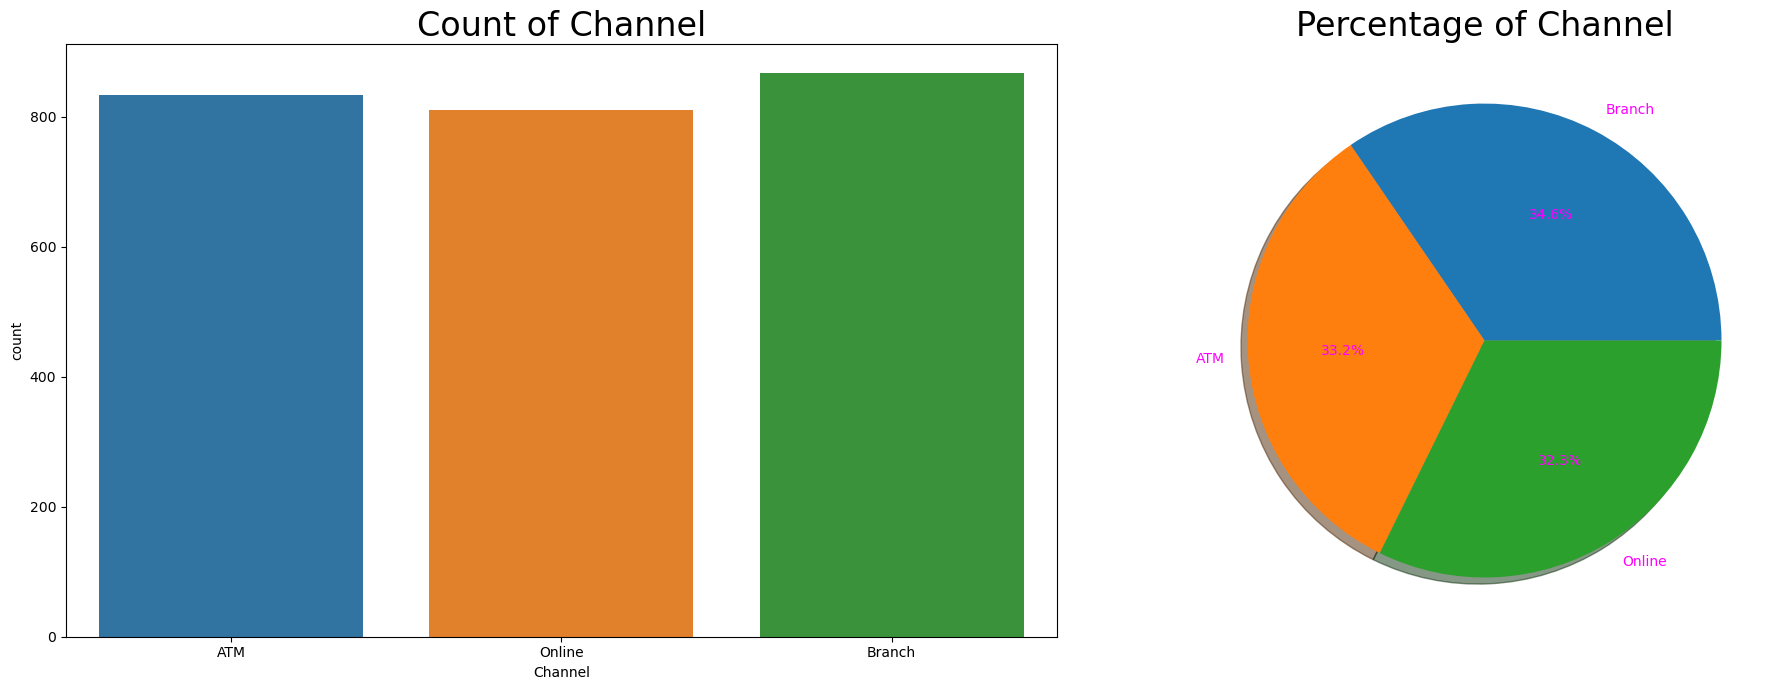

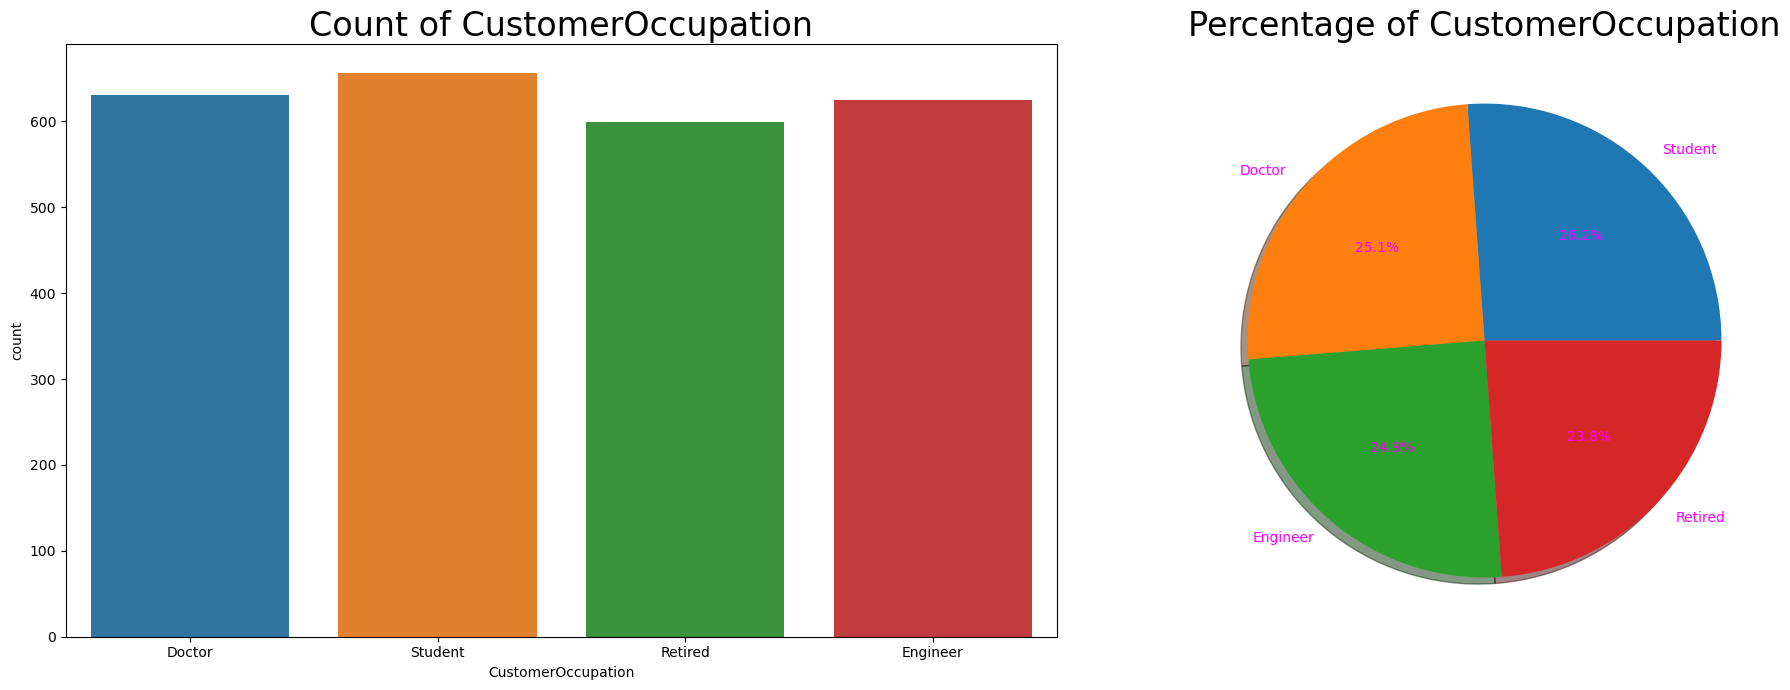

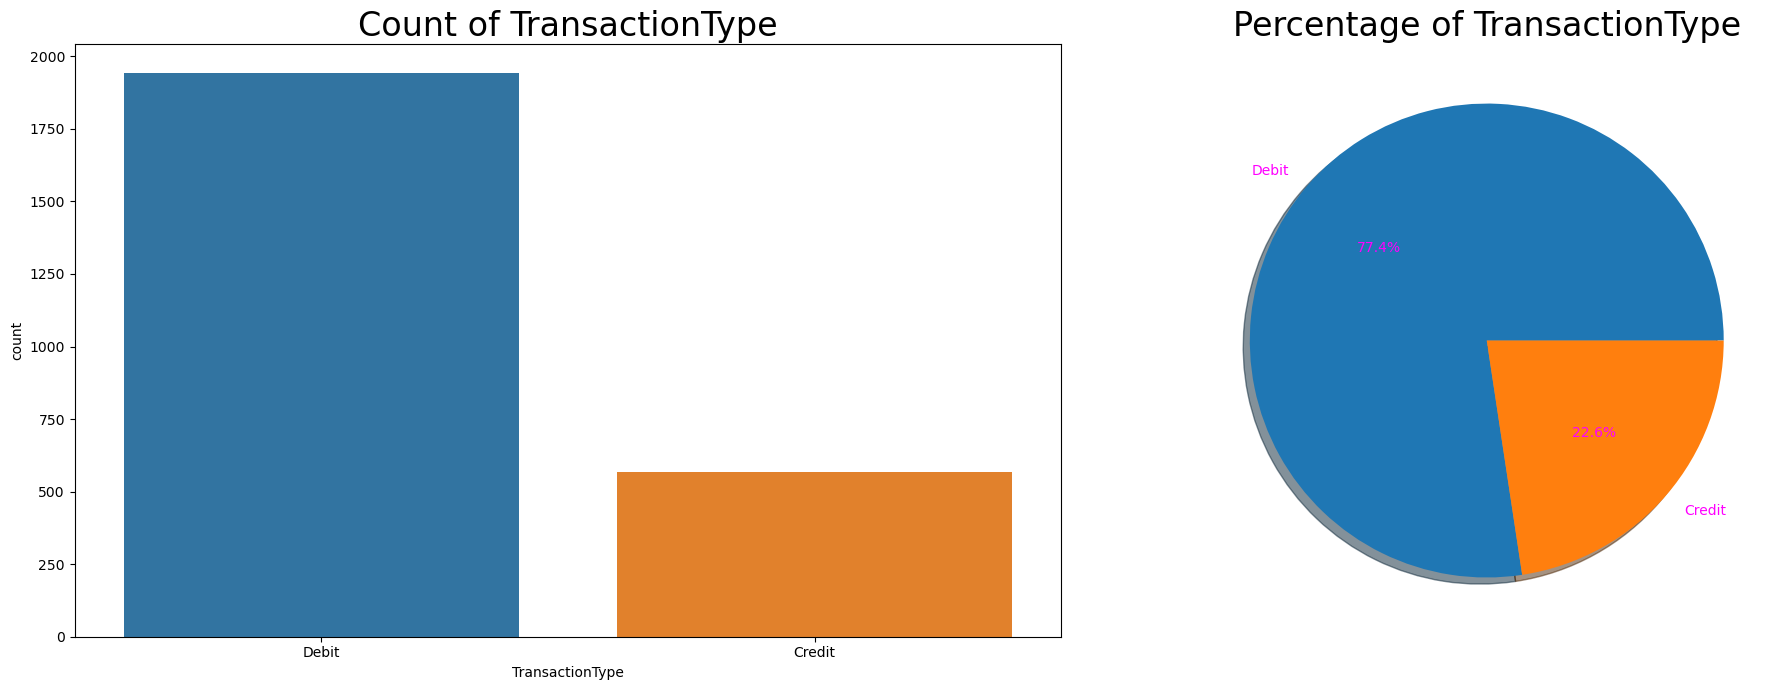

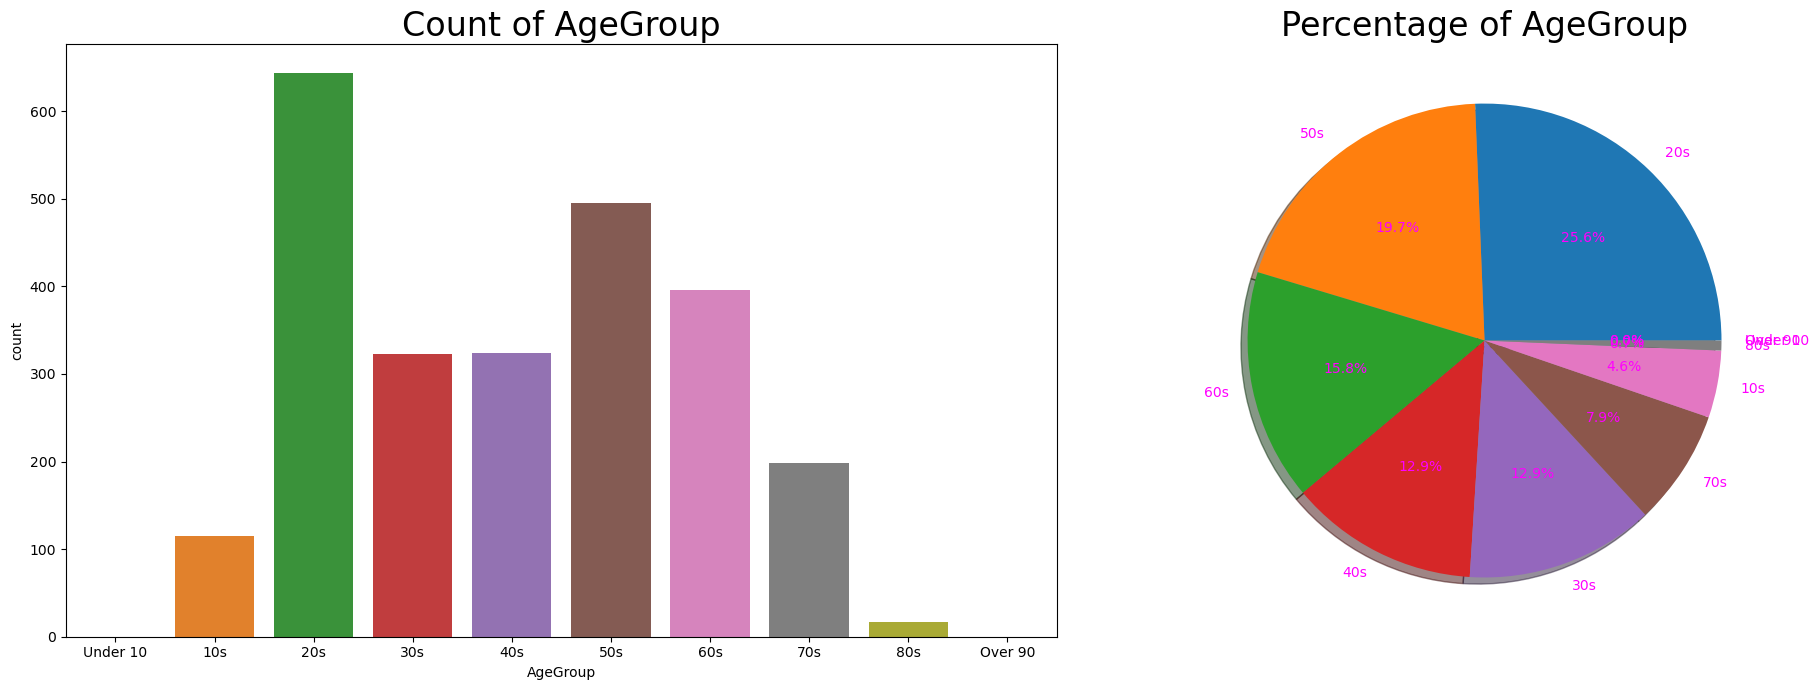

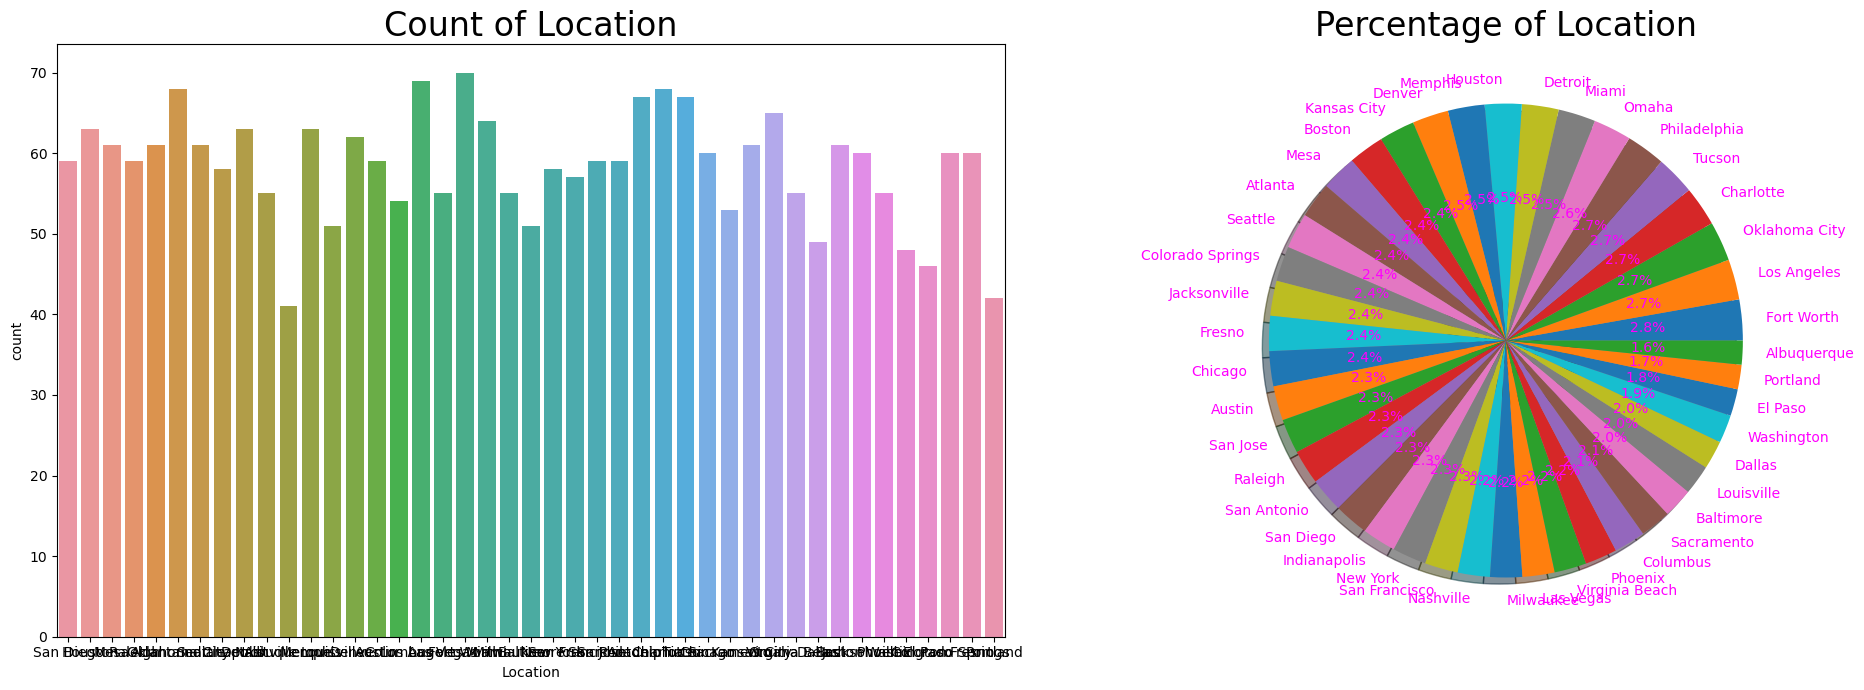

In [ ]:
# 범주별 barplot과 pie chart 생성하기

categorical = ['Channel','CustomerOccupation', 'TransactionType', 'AgeGroup', 'Location']

for i in categorical:
    fig, ax = plt.subplots(1, 2, figsize=(20, 7))
    sns.countplot(data=data, x=i, ax=ax[0])  
    channelpct = data[i].value_counts(normalize=True) * 100  
    ax[1].pie(channelpct, autopct='%0.1f%%', labels=channelpct.index, textprops=dict(color='magenta'), shadow=True)
    ax[0].set_title(f'Count of {i}', fontsize=24)
    ax[1].set_title(f'Percentage of {i}', fontsize=24)
    plt.tight_layout()
    plt.show()

# 일별, 월별 거래량 시각화

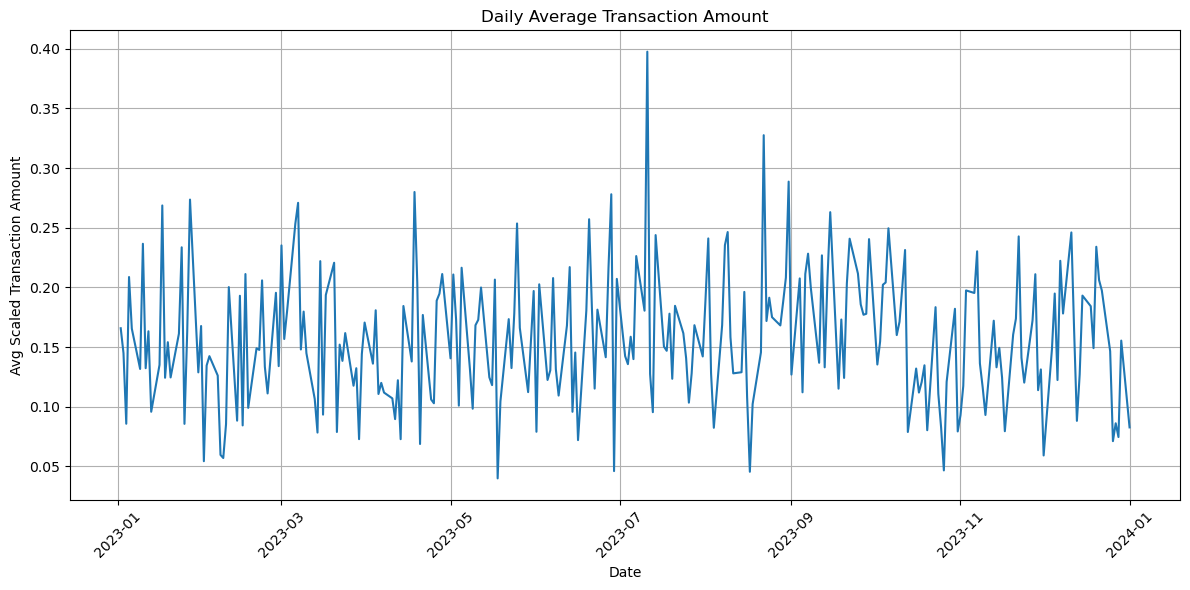

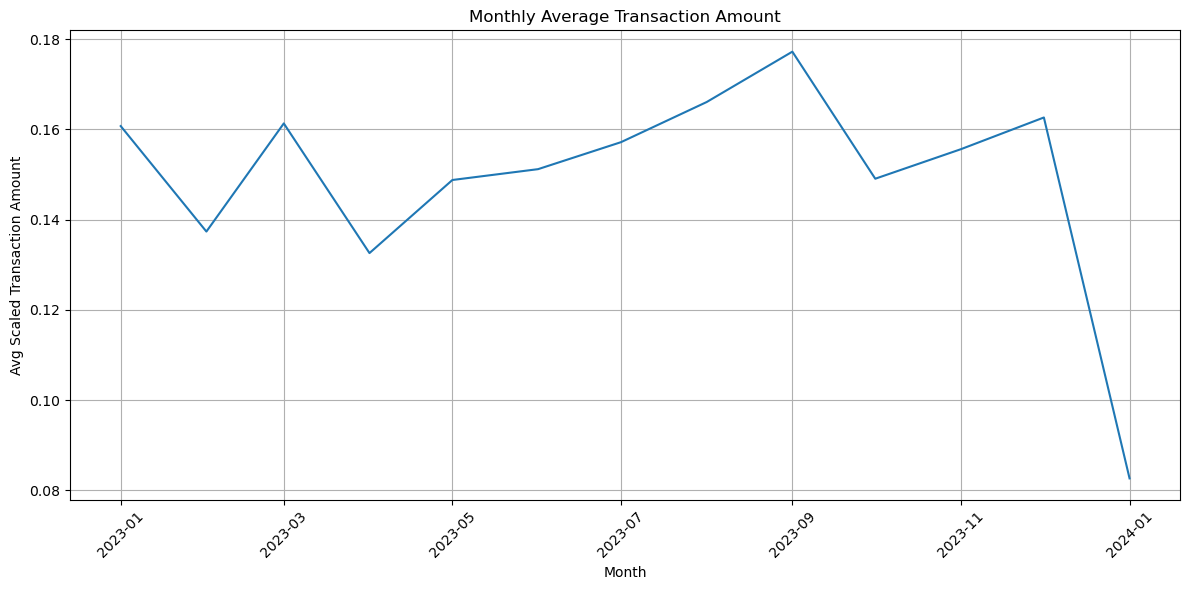

In [13]:
# 날짜를 datetime 형식으로 변환
scaled_data['TransactionDate'] = pd.to_datetime(scaled_data['TransactionDate']).dt.date

group = scaled_data.groupby('TransactionDate')['TransactionAmount'].mean()  # 날짜별 평균 집계

plt.figure(figsize=(12, 6))
plt.plot(group.index, group.values)  # x: 날짜, y: 평균 거래금액
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Avg Scaled Transaction Amount')
plt.title('Daily Average Transaction Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

# 날짜를 datetime 형식으로 변환
scaled_data['TransactionDate'] = pd.to_datetime(scaled_data['TransactionDate'])

# 월별로 변환 (Period 형식 → Timestamp로 변환)
scaled_data['Month'] = scaled_data['TransactionDate'].dt.to_period('M').dt.to_timestamp()

# 월별 평균 거래 금액
monthly_avg = scaled_data.groupby('Month')['TransactionAmount'].mean()

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg.index, monthly_avg.values)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Avg Scaled Transaction Amount')
plt.title('Monthly Average Transaction Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

# 범주별 일별 히트맵, 선 그래프 시각화

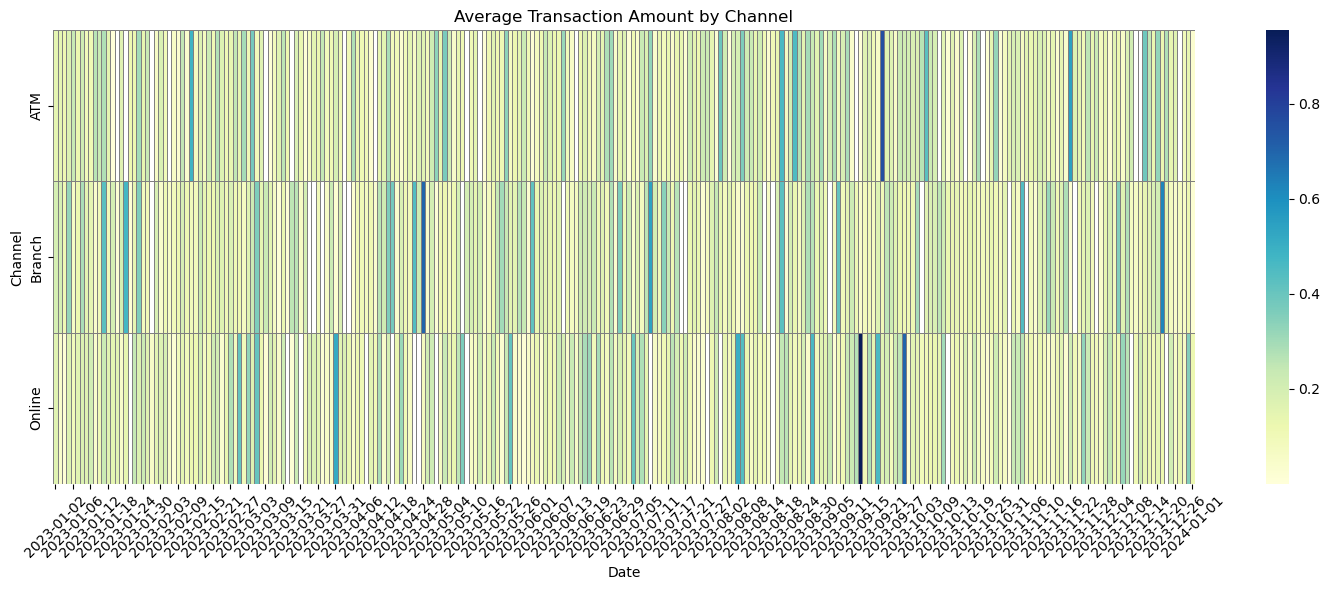

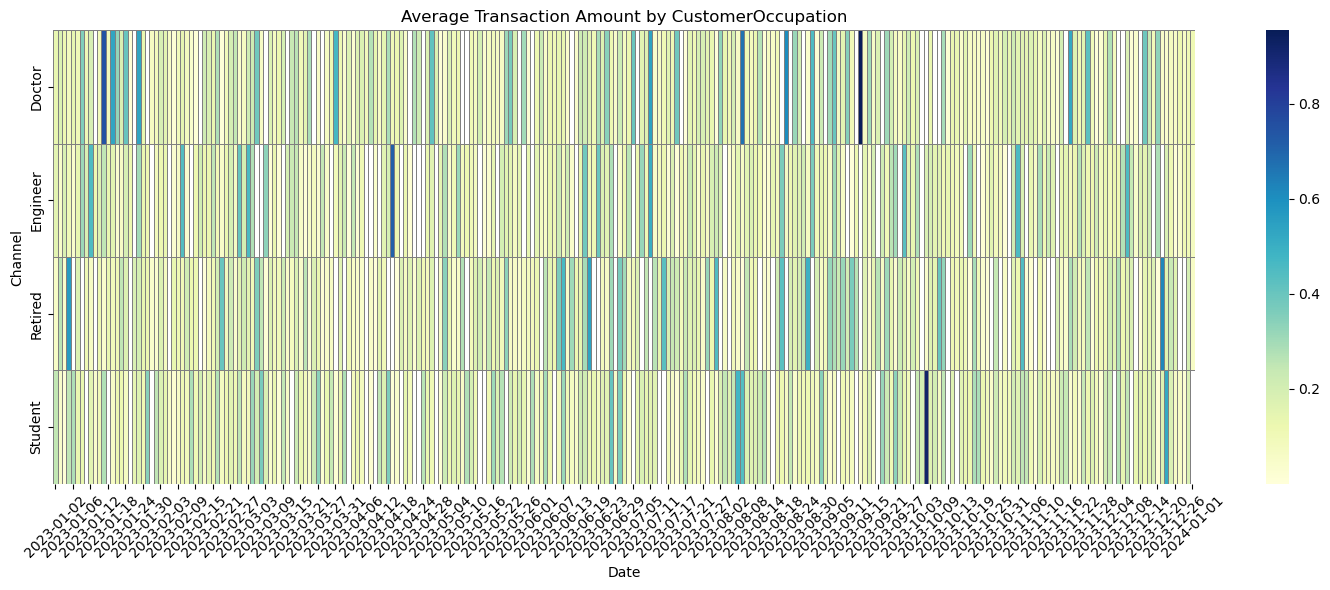

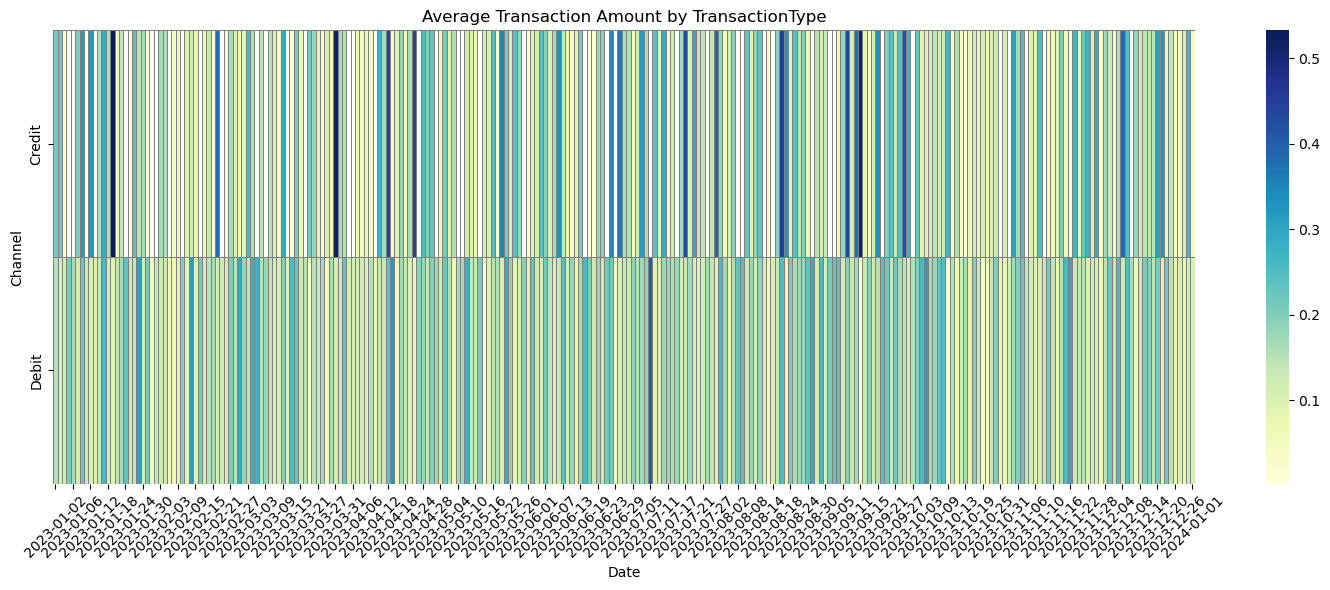

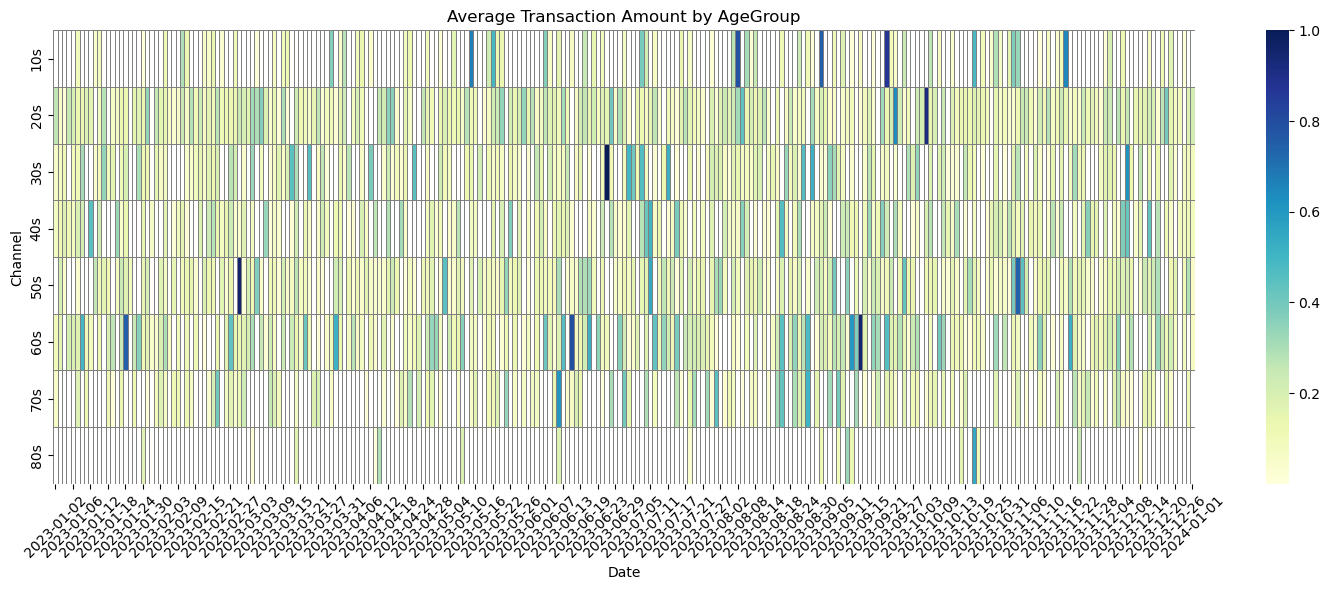

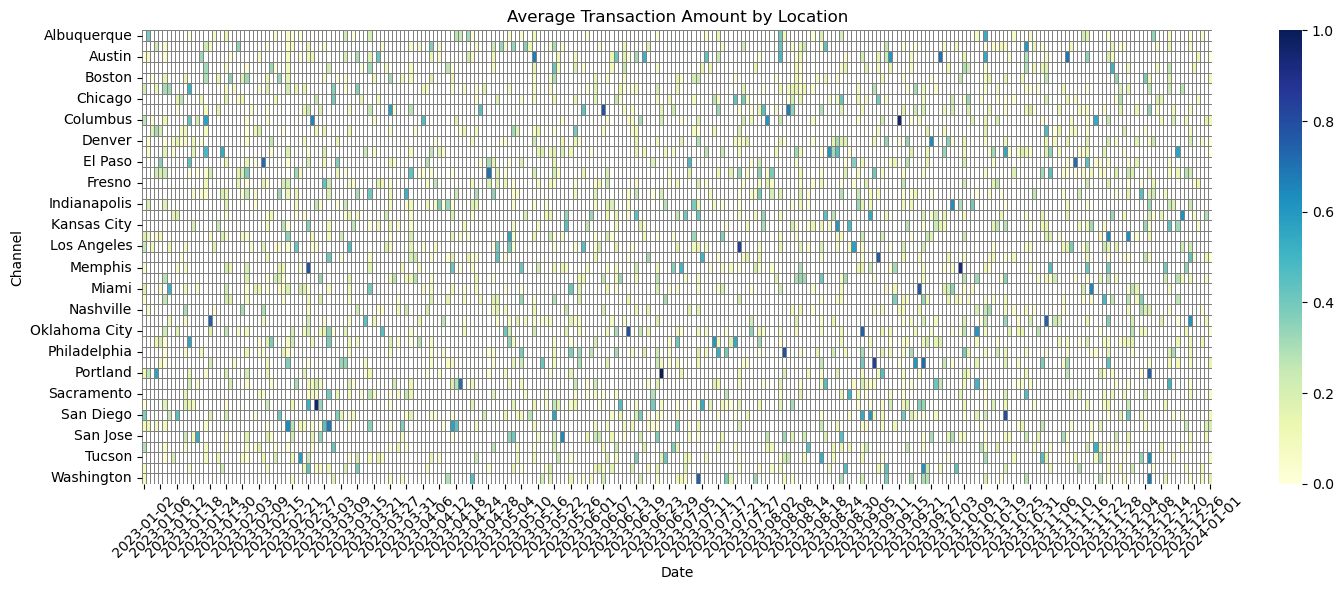

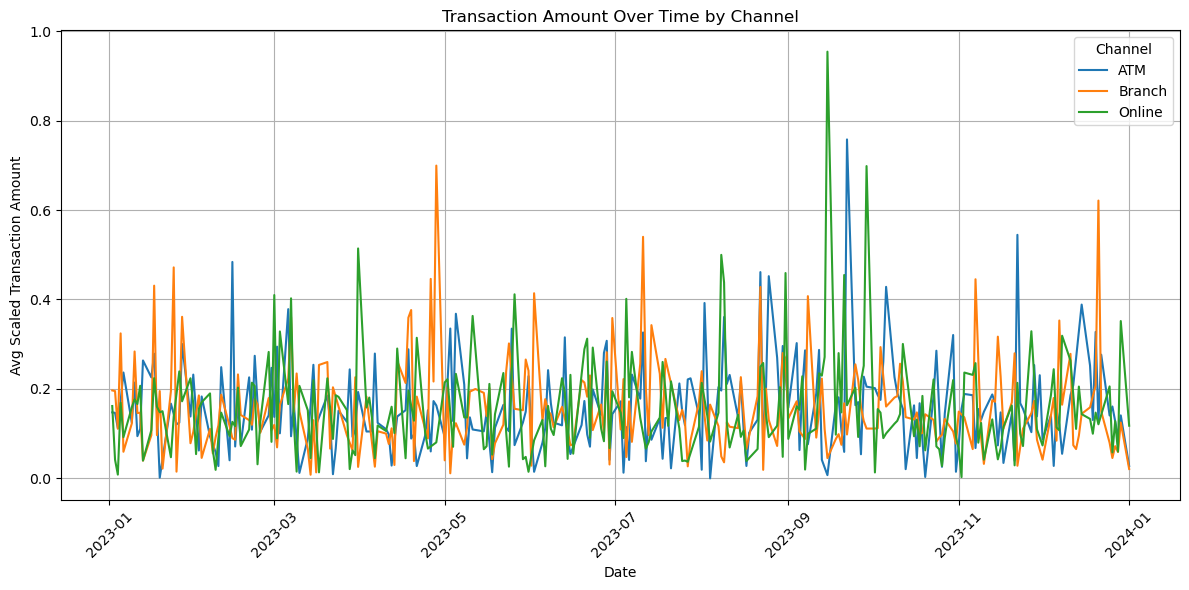

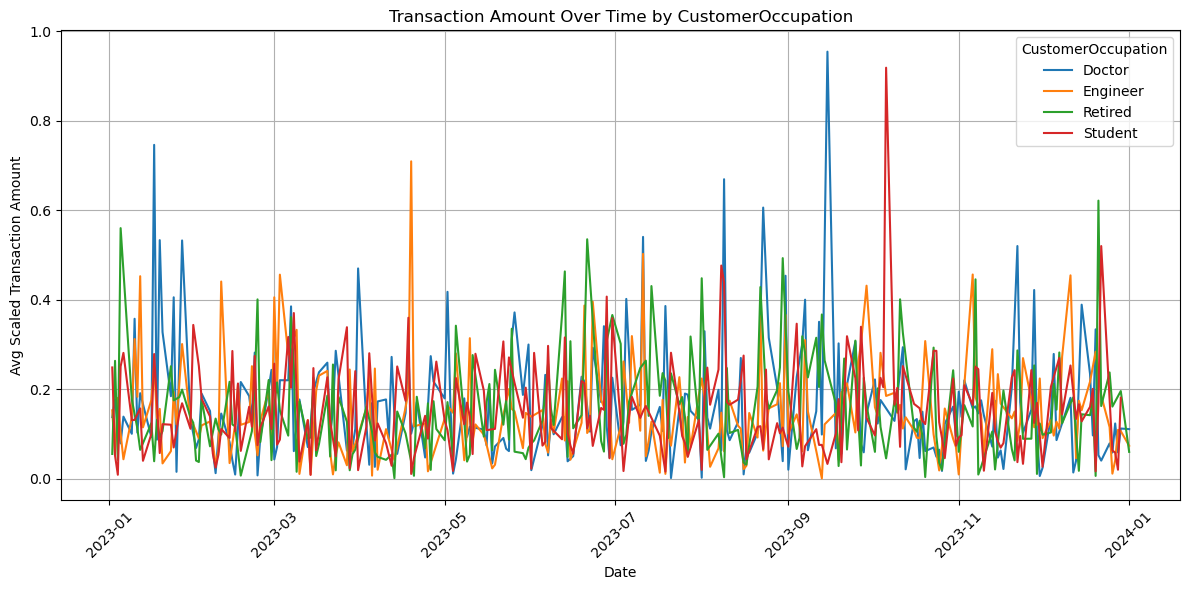

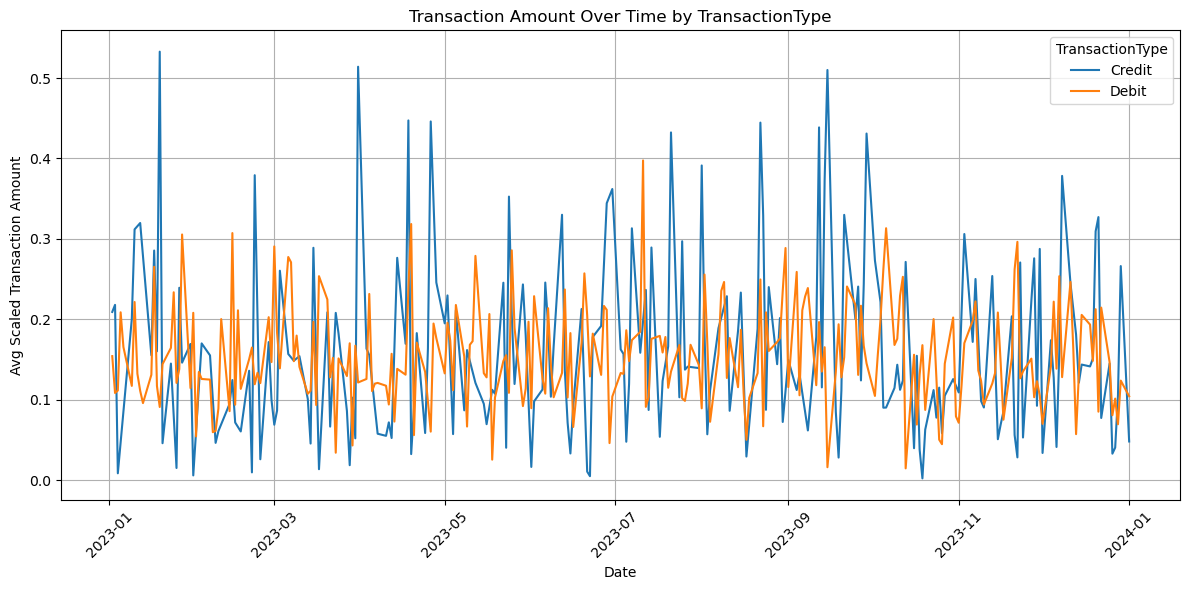

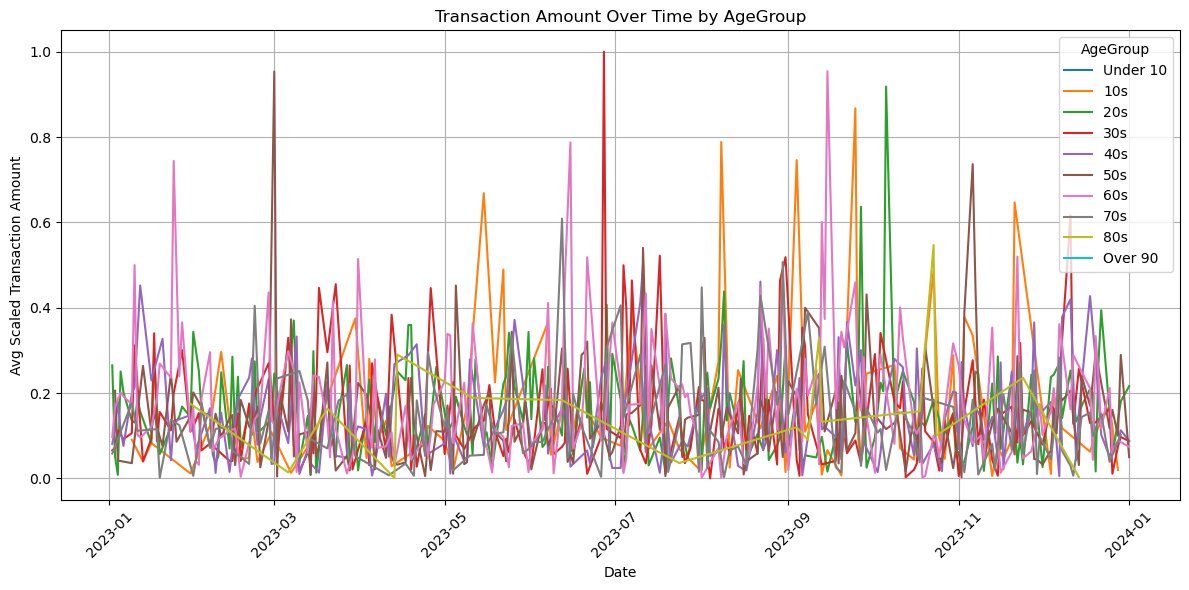

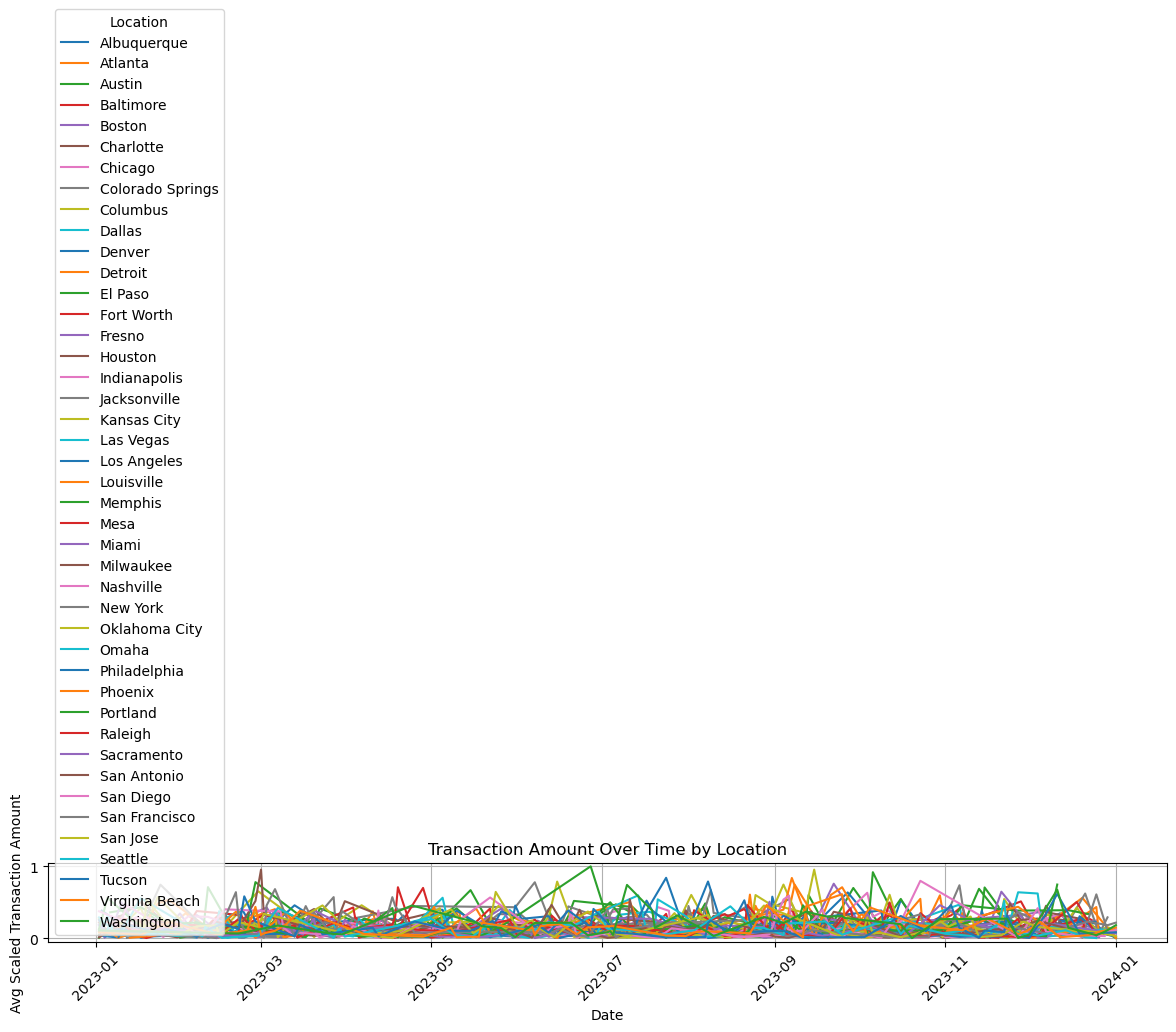

In [11]:
# 날짜 포맷: 하루 단위로 변환
scaled_data['TransactionDate'] = pd.to_datetime(scaled_data['TransactionDate']).dt.date

# 피벗 테이블 생성: (행=범주형, 열=날짜)
for i in categorical:
    pivot = scaled_data.pivot_table(
        index=i,
        columns='TransactionDate',
        values='TransactionAmount',
        aggfunc='mean'
    )

    plt.figure(figsize=(15, 6))
    sns.heatmap(pivot, cmap='YlGnBu', linewidths=0.5, linecolor='gray')
    plt.title('Average Transaction Amount by {0}'.format(i))
    plt.xlabel('Date')
    plt.ylabel('Channel')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

for cat in categorical:
    plt.figure(figsize=(12, 6))
    for level, group_data in scaled_data.groupby(cat):
        daily = group_data.groupby('TransactionDate')['TransactionAmount'].mean()
        plt.plot(daily.index, daily.values, label=str(level))
    
    plt.title(f'Transaction Amount Over Time by {cat}')
    plt.xlabel('Date')
    plt.ylabel('Avg Scaled Transaction Amount')
    plt.xticks(rotation=45)
    plt.legend(title=cat)
    plt.grid(True)
    plt.tight_layout()
    plt.show()